# Blind Source seperation using FastICA

> ICA is used to estimate sources given noisy measurements.
Eg: Given 3 instruments playing simultaenously and 3 microphones recording the mixed signals. ICA is used to recover the sources i.e what is played by each instrument.

In [1]:
import numpy as np
from scipy import signal

np.random.seed(0)

In [4]:
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2*time) # Signal 1: sinusoidal signal
s2 = np.sign(np.sin(3 * time)) # Signal 2: square signal
s3 = signal.sawtooth(2 * np.pi * time) # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size = S.shape) # Add noise

S /= S.std(axis=0) # Standardize the data
# Mix Data
A = np.array([[1,1,1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]) # Mixing Matrix
X = np.dot(S, A.T) # Generate observations

In [5]:
X.shape

(2000, 3)

In [6]:
from sklearn.decomposition import PCA, FastICA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

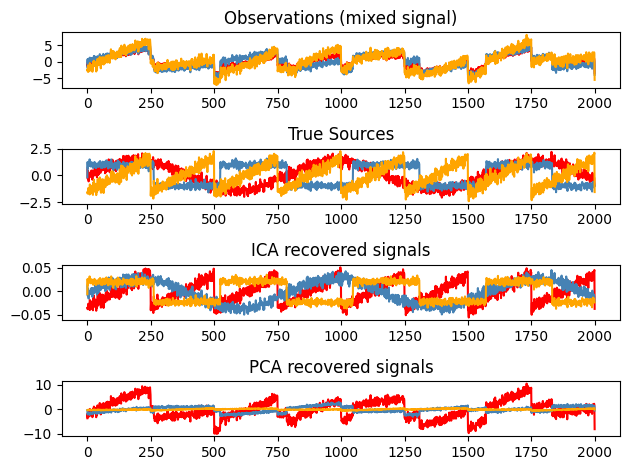

In [7]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

# Downloading Audio File

In [8]:
!wget https://github.com/ZahraBenslimane/SoundSourceSeparation_usingNMF/raw/main/data/piano_mix.wav

--2023-09-20 10:24:20--  https://github.com/ZahraBenslimane/SoundSourceSeparation_usingNMF/raw/main/data/piano_mix.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZahraBenslimane/SoundSourceSeparation_usingNMF/main/data/piano_mix.wav [following]
--2023-09-20 10:24:20--  https://raw.githubusercontent.com/ZahraBenslimane/SoundSourceSeparation_usingNMF/main/data/piano_mix.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308100 (301K) [audio/wav]
Saving to: ‘piano_mix.wav’

piano_mix.wav       100%[===================>] 300.88K  --.-KB/s    in 0.04s   

2023-09-20 10:24:21 (8.28 MB/s) - ‘pian

In [31]:
import librosa
import IPython.display as ipd

In [21]:
audio_sound, sr = librosa.load("piano_mix.wav")

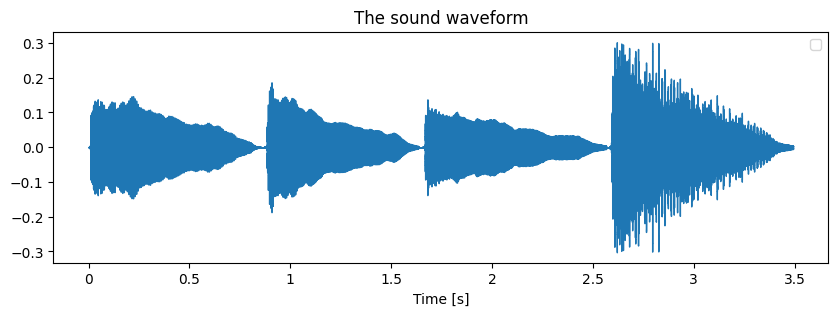

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(audio_sound, sr=sr, ax=ax, axis='time')
ax.set(title="The sound waveform", xlabel='Time [s]')
ax.legend()

In [23]:
# Import FastICA
from sklearn.decomposition import FastICA

# Initialize FastICA with n_components = 3
ica = FastICA(n_components=3)

# Run the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [24]:
ica_result.shape

(2000, 3)

In [25]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

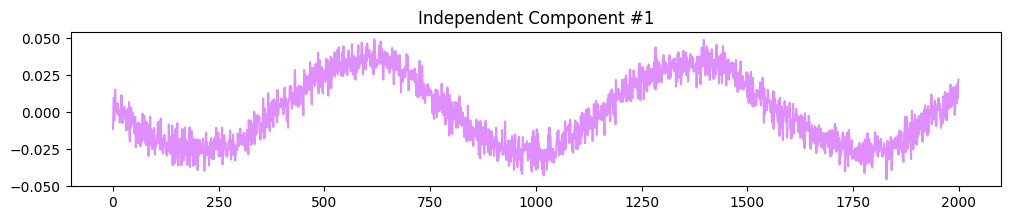

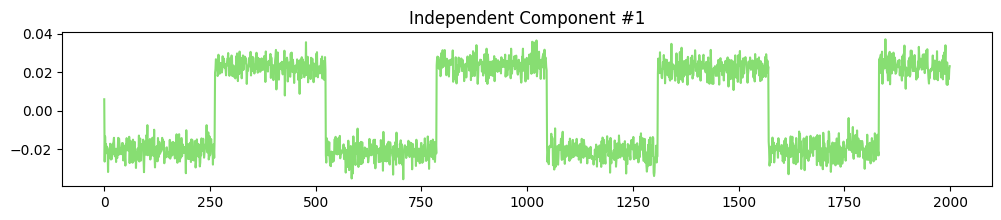

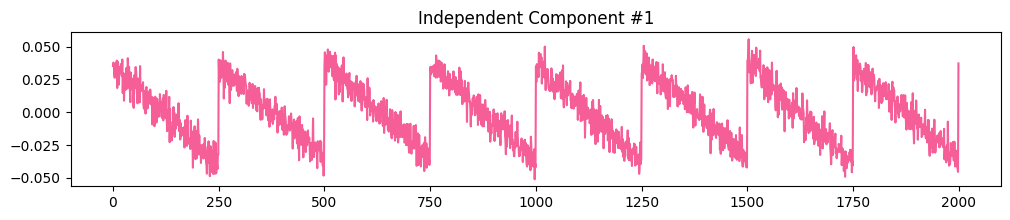

In [30]:
# Plot independent component
plt.figure(figsize=(12, 2))
plt.title("Independent Component #1")
plt.plot(result_signal_1, c = '#df8efd')
plt.show()

# Plot independent component
plt.figure(figsize=(12, 2))
plt.title("Independent Component #1")
plt.plot(result_signal_2, c='#87de72')
plt.show()


# Plot independent component
plt.figure(figsize=(12, 2))
plt.title("Independent Component #1")
plt.plot(result_signal_3, c='#f65e97')
plt.show()

In [37]:
from scipy.io import wavfile

# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

# Write wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [38]:
ipd.Audio("result_signal_1.wav")


In [39]:
ipd.Audio("result_signal_1.wav")


In [40]:
ipd.Audio("result_signal_1.wav")